# TASK 1: Data Integration

# Importing the packages

In [1]:
import geopandas as gpd 
import numpy as np
import pandas as pd 
import matplotlib as plt
from shapely.geometry import Point
import re
from math import sin, cos, sqrt, atan2, radians
import operator
from datetime import datetime
import statistics
from numpy import median
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

# 1.Reading the data file and shape file

In [2]:
data = pd.read_csv("29772990.csv")
shapefile = gpd.read_file("VIC_LOCALITY_POLYGON_shp.dbf")

We are removing the duplicates from the data frame, which has the dupliacte IDS

In [3]:
data.describe(include=['O'])

,ID,Address,Type,Date
count,720,720,720,720
unique,684,683,3,56
top,ID370566046,16 Benambra Dr,h,12/08/2017
freq,2,2,519,31


In [4]:
data = data.drop_duplicates(subset='ID')

In [5]:
data = data.reset_index(drop=True) # restting the index after dropping the duplicate values 

In [6]:
data.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID578860701,33 Bedford St,3,h,860000.0,23/09/2017,2.0,2.0,593.0,5.0,-37.72057,144.87558
1,ID464458363,9 Dorset St,4,t,1170000.0,9/09/2017,3.0,2.0,725.0,83.0,-37.89868,145.14635
2,ID917430410,5/28 Eleanor St,2,t,480000.0,6/08/2016,1.0,1.0,556.0,9.0,-37.79190,144.88540
3,ID344040544,108 Willsmere Rd,3,h,1775000.0,19/08/2017,2.0,4.0,733.0,114.0,-37.79398,145.03777
4,ID948004615,6 Brigden Ct,3,h,663500.0,3/06/2017,2.0,1.0,991.0,104.0,-37.65887,145.06254


### Inserting Suburb column to the data frame

### Mapping the latitude and longitude position with the latitude and longitude positions and finding the Suburb
converting the latitude and longitude to point and then comparing with the shape file and extracting the suburb for the particular latitude and longitude position

Suburb column has been added to the main data 

In [ ]:

location = [] # creating the list to append all the locations 
for i in range(len(data)):
    lon = data['Longtitude'][i] # extracting the latitude one by one 
    lat = data['Lattitude'][i] # extracting the longitude one by one 
    point = Point(lon,lat) # converting the latitude and longitude as point 
    for j in range(len(shapefile)): 
        if point.within(shapefile['geometry'][j]): # checking the point isin the shapefile
            location.append(shapefile['VIC_LOCA_2'][j]) # if find then we are appending it to the list 
            
data['Suburb'] = location
data.head()

# Fetching the council from the council file 
- reading the council text file
- matching the council information with the data frame and finding the appropritae council for the suburb

In [8]:
data['Council'] = "" # creating the empty column in a data frame to append the values 
li = [] # creating the 
council = []
file1 = open("Councils.txt","r+") # readig the council data from the council file 
lines = file1.readlines() # extracting the data line by line 

for i in range(len(lines)):
    a = lines[i].split(":")[1].rstrip() #rstrip is used for stripping the spaces at the end of the string  and split has concil information
    b = lines[i].split(":")[0]# split has the information of the subrbs belong to the council
    matches=re.findall(r'\'(.+?)\'',a) # regular expression to extract the all the suburb strings and append to list 
    match = matches # appending to list of matches to the variable 
    match.insert(0,b) # making the first position as the council inthe list for the suburb
    li.append(match)# appending the list to list li
     
for i in range(len(location)):# reading the data from the main data file and fetching the location details to find the council
    for j in range(len(li)): # check the length of the list for finding the council 
        for a in li[j]:
            if a.lower() == location[i].lower(): # converting all the values to lower for comparision 
                data['Council'][i] = li[j][0] # appending the council data to the council column in the data frame 


C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# 2. Crime by location A, B, C

Reading the Excel file provided 

In [9]:
cols = [1,2,3,4,5,6,7,8,9] # specifying the columns need to be excluded from the excel file 
df = pd.read_excel("crimebylocationdatatable-yearending31march2016.xlsx",sheet_name='Table 1',usecols= cols) # read the excel file and read from the specific columns
df.columns = df.iloc[18] # making the 18th column as the headings for the data frame 
df = df[19:] # reading the excel file from the 19th column and making it as the data frame 
df.reset_index(inplace = True) # reseting the index values 
del df['index'] # deleting the previous index 
df.head()

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521


Converting the year column into the date time object 

In [10]:
import datetime
dates = []
new = data[['Date','Council']] # creating thr new data frame with only two columns in it , Date and Council 
date = new['Date'] # taking the dates of all from the data frame 

for i in range(len(date)):
    date_str = date[i] # reading each date from the list 
    format_str = '%d/%m/%Y' # The format of the date specified 
    datetime_obj = datetime.datetime.strptime(date_str, format_str) # converting the string to the date time object 
    dates.append(datetime_obj.date().year) # appending the year to the dates list 
new['Date'] = dates# finally appending the list to new data frame 

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


#### caluclating the crime for three specific regions A, B, C 
    Crime is being caluclated for three years from the period of purchase
    Columns created in the data frame
        -crime_A_average
        -rime_B_average
        -crime_C_average
        

In [11]:
# creating the empty data colums in the data frame 
data['crime_A_average'] = "" # column for average crime of region A
data['crime_B_average'] = "" # column for average crime of region B
data['crime_C_average'] = "" # column for average crime of region C
for j in range(len(new)):
    area = new['Council'][j].rstrip() # fetching the council from the new data frame 
    date = int(new['Date'][j]) # fetching the date from the new data frame and converting it to int and storing on the variabke 
    # fetching the crime records based on the area and the range of the date for the below 3 years 
    crime_area = df[(df['Local Government Area'] == area )& (df['Apr - Mar reference period'] < date) & (df['Apr - Mar reference period'] >= date-3)]
    count1 = 0
    count2 = 0
    count3 =0
    crime_division = crime_area[['CSA Offence Division','Offence Count']] # fetching the required columns from count 
    crime_division.reset_index(inplace = True) # resetting the index to true 
    del crime_division['index'] # removing the index from the data frame 
    for i in range(len(crime_division)):
        if crime_division['CSA Offence Division'][i].startswith("A"): # if it starts with A then we are calucalting the average of A
            count1+=crime_division['Offence Count'][i]
        if crime_division['CSA Offence Division'][i].startswith("B"):# if it starts with B then we are calucalting the average of B
            count2+=crime_division['Offence Count'][i]
        if crime_division['CSA Offence Division'][i].startswith("C"):# if it starts with C then we are calucalting the average of C
            count3+=crime_division['Offence Count'][i]
    # passing the values back to the data frame        
    data['crime_A_average'][j] = count1/3
    data['crime_B_average'][j] = count2/3
    data['crime_C_average'][j] = count3/3
                                                                                                                                                                                                                                                                                                                                                                                                       

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# 3. Closest train station , distance to the closet station , travel time to southern cross 

reading the stops and stop times file , trips and calender file 

Condidering the first 2 files from the gtfs folder, Since they are assoictaed with the Train data

Other they arent associated with the trains data 

In [12]:
#stops files
text_file1 = pd.read_table('1/stops.txt',sep=',')
text_file2 = pd.read_table('2/stops.txt',sep=',')
text_file = text_file1.append(text_file2, ignore_index=True)
#stop times file 
stop1 = pd.read_table('1/stop_times.txt',sep=',')
stop2 = pd.read_table('2/stop_times.txt',sep=',')
stops = stop1.append(stop2, ignore_index=True)
# trips file 
trip1 = pd.read_table('1/trips.txt',sep=',')
trip2 = pd.read_table('2/trips.txt',sep=',')
trips = trip1.append(trip2, ignore_index=True)
# calender file 
calendar1 = pd.read_table('1/calendar.txt',sep=',')
calendar2 = pd.read_table('2/calendar.txt',sep=',')
calendar = calendar1.append(calendar2, ignore_index=True)

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead.
  import sys
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: read_table is deprecated, use read_csv instead.
  # This is added back by InteractiveShellApp

### Cleaning the stop times file, date column which was in the improrer date fromat has been converted to proper format


we have fewer columns with the higher values other than the date range such as 25,26 we are correcting them back to the proper format 

In [13]:

l1 = []
l2 = []
time = stops['arrival_time']
time1 = stops['departure_time']
for i in range(len(time)):
    a = re.search(r'(\d\d)+:(\d\d)+:(\d\d)+',time[i]) 
    if(int(a.group(1)) > 23):
        b= int(a.group(1))-24
        c = str(b) + ":" + a.group(2) + ":" + a.group(3)
        l1.append(c)
    else:
        l1.append(time[i])
    a = re.search(r'(\d\d)+:(\d\d)+:(\d\d)+',time1[i])
    if(int(a.group(1)) > 23):
        b= int(a.group(1))-24
        c = str(b) + ":" + a.group(2) + ":" + a.group(3)
        l2.append(c)
    else:
        l2.append(time1[i]) 
stops['arrival_time'] = l1
stops['arrival_time'] = pd.to_datetime(stops['arrival_time'],format='%H:%M:%S').dt.time
stops['departure_time'] = l2
stops['departure_time'] = pd.to_datetime(stops['departure_time'],format='%H:%M:%S').dt.time

For caluclating the train sation and distance we are following the approach

- fecthing the stop ids of the southern cross station 

- merging the stops and trips based on the trip id 

- fetching the trip ids that are associated with the southern cross

- Fetching the trips only that are assoicated with the southern cross 

- Also fecthing the trips that are between 7 and 9:30

- Merging the trips with the calender file 

- Now we are only fetching the trips that are on week days 

In [14]:
text_file[text_file['stop_name'] == 'Southern Cross Railway Station (Melbourne City)']

,stop_id,stop_name,stop_lat,stop_lon
7,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
319,22180,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411


In [15]:
# merge stops and trips based on the trip id 
merged_trips = pd.merge(stops, trips, how='left',on="trip_id")

# from the trips only extracting the trip id associated to the southern cross 
ids = merged_trips['trip_id'][((merged_trips['stop_id'] == 20043) | (merged_trips['stop_id'] == 22180))] 

# checking whether the id is in the trips or not 
id = merged_trips[merged_trips['trip_id'].isin(ids)]

# checking the trip is in the date range of 7 and 9:30
required_trips = id[(id['departure_time']>=datetime.time(7,0,0)) &(id['departure_time']<=datetime.time(9,30,0))]

# merging the trips with the calender based on the service id 
merge_trips = pd.merge(required_trips, calendar, how='left',on="service_id")

# Final extracting the trips associated with on all week days 
final_trip = merge_trips[(merge_trips['monday'] == 1) & (merge_trips['tuesday'] == 1) & (merge_trips['wednesday'] == 1) & (merge_trips['thursday'] == 1) & (merge_trips['friday'] == 1)]


We are dropping the unnecessary columns from the data frame 

In [16]:
final_trip = final_trip.drop(['stop_sequence',
       'stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled',
       'route_id', 'service_id', 'shape_id', 'trip_headsign','monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'start_date', 'end_date'
       ],axis=1)

We are merging the final_trip with the stops based on the stop id to fetch all the trips
   - we are dropping all the duplicates 
   - resetting the index for the data frame 

In [17]:
final_trip = pd.merge(final_trip, text_file, how='left',on="stop_id")
final_trip1 = final_trip.drop_duplicates()
final_trip1= final_trip1.reset_index(drop=True)

We are creating the empty columns for attaching the values to the data frame 
    - train_station_id
    - distance_to_train_station

In [18]:
stop_id = final_trip1['stop_id'] # fetching the unique station ids 
stop_id = stop_id.drop_duplicates() # taking the ujnique stop ids in the data frame
stop_id = stop_id.tolist() # Converting it to the list
data['train_station_id'] = ""
data['distance_to_train_station'] = ""

## Fetching the station id and distance to the station id from the latitude positions 

We are caluclating the distance for each stop id and checking minimum distaance and also checking whether we it have trip to southern cross station.

We are considering closet station as that which has only the direct trips 

In [19]:
mini = [] # creating the lsit to store the variables 
# caluclating the distance of the station by using the formaula
for j in range(len(data)):
    lat1 = radians(data['Lattitude'][j]) 
    lon1 = radians(data['Longtitude'][j])
    d = {}
    for i in range(len(text_file)):
        R = 6378000
        lat2 = radians(text_file['stop_lat'][i])
        lon2 = radians(text_file['stop_lon'][i])
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        d[text_file['stop_id'][i]] = distance
    #sorting the dict items for the values 
    sorted_dict = sorted(d.items(),key=operator.itemgetter(1))
    g = dict(sorted_dict) # converting the list of tuples as dict 
    find = 0 # intializing the find variable 
    found = False # setting the flag for breaking the loop 
    for k in range(len(g)):
        if list(g.keys())[k] in stop_id:# picking the stop id only if it is in the stop id staisfying the conditions, in between time and trips with weekdays 
            p1 = list(g.keys())[k] # taking the key 
            if((p1 == 22180) | (p1 == 20043)): # if the stop id is southern cross, then we are directly assigning 
                data['train_station_id'][j] = list(g.keys())[k] # we are appending the station id to column of data frame
                data['distance_to_train_station'][j] = g[list(g.keys())[k]]
                found = True
                break # we are breaking the loop 
            else:# else we are checking the conditions and finding whether the nearest station has direct trip or not 
                pa = final_trip1['trip_id'][final_trip1['stop_id']== p1].tolist()
                #considering the station only if it has direct trip to southern cross
                for pb in pa:
                    p2 = pb.strip()
                    a = stops[(stops['trip_id']==p2) & (stops['stop_id']==p1)] # taking the stop sequence of stop id
                    b = stops[(stops['trip_id']==p2) & ((stops['stop_id']==22180) |  (stops['stop_id']==20043))] # taking the stop sequence of southern cross station
                    if(int(a['stop_sequence']) < int(b['stop_sequence'])): # comparing the sequence and the we are fetching the station id and distance 
                        find += list(g.keys())[k]
                        data['train_station_id'][j] = list(g.keys())[k] # we are appending the station id to column of data frame
                        data['distance_to_train_station'][j] = g[list(g.keys())[k]] # we are appending the distance to the column of a data frame 
                        found = True
                        break # we are breaking the loop after shortest find with the direct trip 
        if found:
            break # we are terminating the entire loop
    

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

## 4.caluclating the travel time 

First we are only taking the unique station ids, since we can see that in our data for many locations near station will be same 

Based on the sation id, we are taking out trip ids associated with that station, from the filtered trips schedules 

Then caluclating the travel time and and for all the trips we are caluclating the avg time.

In [20]:
# they are similar boarding station id for many of the locations, So considering the unique of the station ids
# then caluclating the travel time from that station to the southern cross 
station = data['train_station_id'].tolist() # fetching the unique rows from the station ids 
my_set = set(station)
my_list = list(my_set)

In [21]:
trip_time = []
for i in range(len(my_list)):
    p1 = my_list[i] # picking the boarding station id from the list 
    pa = final_trip1['trip_id'][final_trip1['stop_id']== p1].tolist() # fecthing all the trips from the particular station id  
    check = [] # list used to store travel time for all the trips from the station to southern cross
    for pb in pa: 
        p2 = pb.strip() # removing the empty spaces at the start of the string 
        a = stops[(stops['trip_id']==p2) & (stops['stop_id']==p1)] # extracting the column, with the trip id and stopid 
        b = stops[(stops['trip_id']==p2) & ((stops['stop_id']==22180) |  (stops['stop_id']==20043))] # extracting column with the southern cross station of same trip 
        if(int(a['stop_sequence']) < int(b['stop_sequence'])): # checking the stop sequence
            # if our boarding station stop sequence is less than the southern cross station only these we are considering  
            time1 = a['departure_time'].to_string(index=False).strip() # taking the departure time of boarding time for the trip 
            time2 = b['arrival_time'].to_string(index=False).strip() # taking the arrival time of the southern cross reaching time for the trip
            
            datetime_object1 = datetime.datetime.strptime(time1, '%H:%M:%S') # converting the string type to date time object 
            datetime_object2 = datetime.datetime.strptime(time2, '%H:%M:%S') 
            diff = datetime_object2 - datetime_object1 # caluclating the time difference 
            check.append(diff.seconds/60)# converting it to seconds and appending it to the lsit 
            # since we will have many trips from the station to southern cross in time range 7 to 9:30
    if len(check) > 0: 
        avg = int(statistics.mean(check)) # find the average of all the travels 
        trip_time.append(avg) # appending it to the list 
        #print(avg)
    else:
        trip_time.append(0)


In [22]:
# converting it to the data frame and merging with the original transform
new_data = pd.DataFrame()
new_data['station'] = my_list
new_data['time'] = trip_time 
data =  pd.merge(data,new_data,left_on = "train_station_id", right_on = "station", how = "left")
data = data.rename(columns={'time': 'travel_min_to_CBD'})
data = data.drop(['station'],axis=1)

## 5. Over Price
Created the new data frame with the required columns and to check the over price or not 

In [23]:

new = data[['Suburb','Rooms','Bathroom','Car','Type','Price','Date']].copy() # creating the new data frame 
l = list(range(0, 684)) # this is to add the index to the data frame for easy retreving of the information 
new['year'] = pd.to_datetime(new['Date'])
new['Sell Year'] = new['year'].dt.year
new['add'] = l
new["Boolean"] = ""
# finding all the duplicated rows from the sliced data frame 
duplicates = new[new[['Suburb','Rooms','Bathroom','Car','Type','Sell Year']].duplicated() == True] # finding all the duplicated rows 
duplicates.reset_index(inplace = True)
# Now we are taking the median price of all the duplicate columns 
for i in range(len(duplicates)):
    price = []
    got =new[(new['Suburb'] == duplicates['Suburb'][i] ) & (new['Rooms'] == duplicates['Rooms'][i]) & (new['Bathroom'] == duplicates['Bathroom'][i] ) & (new['Car'] == duplicates['Car'][i]) & (new['Type'] ==  duplicates['Type'][i] ) & (new['Sell Year'] == duplicates['Sell Year'][i] ) ]
    price = got['Price']
    val = got['add'].tolist()
    med = median(price)# caluclating the median price 
    for i in range(len(val)):
        a = int(val[i])
        new["Boolean"][a] = med

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Comparing the price with the median price

Assigning the default value as -1 for unique property 

If the price is same as median or less than median price of the property we are assigning 0
    
If the price is greater than the median price we are appending the 1

In [24]:
new['Boolean'].replace('',0, inplace=True)
col = []
for i in range(len(new)):
    if new['Boolean'][i] == 0:# checking with the median price if 0 
        col.append(0)
    elif new['Price'][i] <= new['Boolean'][i]: # price less than the median price append 0 
        col.append(0)
    else:
        col.append(1)# price more than the median price append 1 
data['over_priced?'] = col

In [25]:
data = data.drop(['Council'],axis=1) # dropping the excess columns 

In [26]:
data.shape # shape of the file 

(684, 20)

In [27]:
data.to_csv (r'29772990_solution.csv', index = None, header=True) # writing to excel file

In [28]:
data.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,crime_A_average,crime_B_average,crime_C_average,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?
0,ID578860701,33 Bedford St,3,h,860000.0,23/09/2017,2.0,2.0,593.0,5.0,-37.72057,144.87558,AIRPORT WEST,1214.67,5603.67,375.333,20033,4055.59,34,0
1,ID464458363,9 Dorset St,4,t,1170000.0,9/09/2017,3.0,2.0,725.0,83.0,-37.89868,145.14635,GLEN WAVERLEY,56.3333,98.3333,19,22249,3676.78,33,0
2,ID917430410,5/28 Eleanor St,2,t,480000.0,6/08/2016,1.0,1.0,556.0,9.0,-37.79190,144.88540,FOOTSCRAY,1923.67,8979.33,620.333,20023,1103.03,19,0
3,ID344040544,108 Willsmere Rd,3,h,1775000.0,19/08/2017,2.0,4.0,733.0,114.0,-37.79398,145.03777,KEW,288,712,75.6667,19931,1827.25,24,0
4,ID948004615,6 Brigden Ct,3,h,663500.0,3/06/2017,2.0,1.0,991.0,104.0,-37.65887,145.06254,MILL PARK,1508.33,6073,553.667,45795,1151.25,49,0


# Task 2 Data Reshapping 

We are considering the four columns 

Rooms ,

crime_C_average, 

travel_min_to_CBD , 

property_age 

attributes as the predictors for the Price column 

for the target variable "Price"

In [29]:
#Data frame has been created for the columns 
trans = data[['Age', 'travel_min_to_CBD', 'crime_C_average','Rooms','Price']]
trans.head()

,Age,travel_min_to_CBD,crime_C_average,Rooms,Price
0,5.0,34,375.333,3,860000.0
1,83.0,33,19,4,1170000.0
2,9.0,19,620.333,2,480000.0
3,114.0,24,75.6667,3,1775000.0
4,104.0,49,553.667,3,663500.0


In [30]:
trans.describe()

,Age,travel_min_to_CBD,Rooms,Price
count,684.000000,684.000000,684.000000,6.840000e+02
mean,55.589181,25.225146,2.928363,1.120052e+06
std,37.412613,10.779116,0.927448,6.886399e+05
min,2.000000,0.000000,1.000000,2.100000e+05
25%,21.000000,18.000000,2.000000,6.487500e+05
50%,49.000000,25.000000,3.000000,9.475000e+05
75%,81.500000,32.000000,3.000000,1.370000e+06
max,151.000000,68.000000,7.000000,6.500000e+06


As we can see from the above table we can see that all the columns with respect to the price are different, Now we will be scaling them to the one scale 

Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.
    
Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.

# 1. MinMax Noramlisation:

In [31]:
#scaling the values using the MinMax Normalization
minmax_scale = preprocessing.MinMaxScaler().fit(trans[['Age', 'travel_min_to_CBD', 'crime_C_average','Rooms']])
df_minmax = minmax_scale.transform(trans[['Age', 'travel_min_to_CBD', 'crime_C_average','Rooms']]) # 
df_minmax[0:5]

array([[0.02013423, 0.5       , 0.18337688, 0.33333333],
       [0.54362416, 0.48529412, 0.00881777, 0.5       ],
       [0.04697987, 0.27941176, 0.30339647, 0.16666667],
       [0.75167785, 0.35294118, 0.0365774 , 0.33333333],
       [0.68456376, 0.72058824, 0.27073808, 0.33333333]])

We are adding the scaled values to the data frame 

In [32]:
#Adding the sclaed values to the data frame
trans['Max_age'] = df_minmax[:,0] # So max_age is scaled values of age 
trans['Max_travel'] = df_minmax[:,1] # So max_travel is scaled values of minumum travel time to CBD 
trans['Max_crime'] = df_minmax[:,2] #
trans['Max_room'] = df_minmax[:,3]

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

The normalized value of max must be 1.0 exactly

In [33]:
print("\nMinMax Noramlisation: (standardisation) : :")
print('\nMean after standardisation:Age = {:.2f}, Travel Min = {:.2f},Crime C = {:.2f},Rooms = {:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min(),  df_minmax[:,3].min()))
print('\nStandard deviation after standardisation:Age = {:.2f}, Travel Min = {:.2f},Crime C = {:.2f},Rooms = {:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max(), df_minmax[:,3].max()))


MinMax Noramlisation: (standardisation) : :

Mean after standardisation:Age = 0.00, Travel Min = 0.00,Crime C = 0.00,Rooms = 0.00

Standard deviation after standardisation:Age = 1.00, Travel Min = 1.00,Crime C = 1.00,Rooms = 1.00


Min-max normalization is one of the most common ways to normalize data. 

For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [34]:
trans.head()

,Age,travel_min_to_CBD,crime_C_average,Rooms,Price,Max_age,Max_travel,Max_crime,Max_room
0,5.0,34,375.333,3,860000.0,0.020134,0.500000,0.183377,0.333333
1,83.0,33,19,4,1170000.0,0.543624,0.485294,0.008818,0.500000
2,9.0,19,620.333,2,480000.0,0.046980,0.279412,0.303396,0.166667
3,114.0,24,75.6667,3,1775000.0,0.751678,0.352941,0.036577,0.333333
4,104.0,49,553.667,3,663500.0,0.684564,0.720588,0.270738,0.333333


#### Compare the variables before and after normalization with plots
In order to investigate how the normalization actually affect the data, we can visualize the data by plotting the variable values.

can see from above graphs that both original and standardized data are in the same shape but shifted.

With min-max normalization, we were guaranteed to reshape all of our features to be between 0 and 1.

(<matplotlib.axes._subplots.AxesSubplot at 0x1971d0812b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1971d0812b0>)

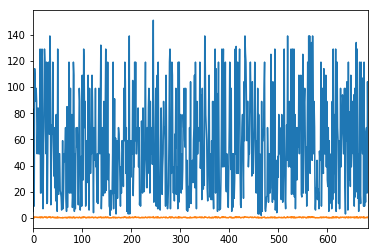

In [35]:
trans["Age"].plot(), trans["Max_age"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x19712c00c18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19712c00c18>)

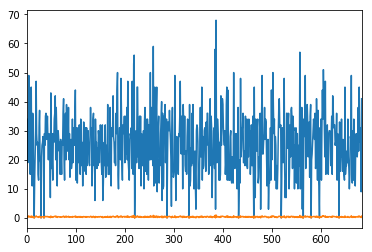

In [36]:
trans["travel_min_to_CBD"].plot(), trans["Max_travel"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x19712c80588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19712c80588>)

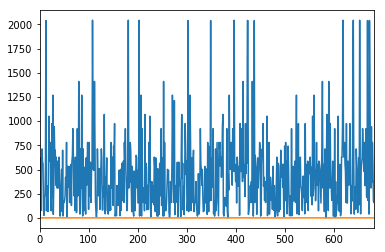

In [37]:
trans["crime_C_average"].plot(), trans["Max_crime"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x19712cd1588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19712cd1588>)

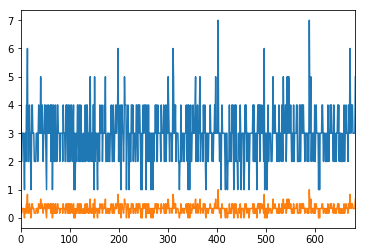

In [38]:
trans["Rooms"].plot(), trans["Max_room"].plot()

# 2. Z-Score Normalisation (standardisation):

Using z-score normalization, the x-axis now has a range from about -1.5 to 1.5

In [39]:
std_scale = preprocessing.StandardScaler().fit(trans[['Age', 'travel_min_to_CBD', 'crime_C_average','Rooms']])
df_std = std_scale.transform(trans[['Age', 'travel_min_to_CBD', 'crime_C_average','Rooms']]) # an array not a df
df_std[0:5]

array([[-1.35318542,  0.81465631, -0.16921556,  0.07729793],
       [ 0.73319867,  0.72181643, -1.08559641,  1.15631397],
       [-1.24619136, -0.57794178,  0.46084985, -1.0017181 ],
       [ 1.5624026 , -0.11374242, -0.93986699,  0.07729793],
       [ 1.29491746,  2.20725439,  0.28940348,  0.07729793]])

In [40]:
trans['Z_age'] = df_std[:,0] # so 'Ascaled' is Alcohol scaled
trans['Z_travel'] = df_std[:,1]
trans['Z_crime'] = df_std[:,2]
trans['Z_room'] = df_std[:,3]

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [41]:
print("Z Noramlisation: (standardisation) :")

print('\nMean after standardisation:Age = {:.2f}, Travel Min = {:.2f},Crime C = {:.2f},Rooms = {:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,2].mean(),  df_std[:,3].mean()))
print('\nStandard deviation after standardisation:Age = {:.2f}, Travel Min = {:.2f},Crime C = {:.2f},Rooms = {:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].std(), df_std[:,3].std()))


Z Noramlisation: (standardisation) :

Mean after standardisation:Age = -0.00, Travel Min = 0.00,Crime C = -0.00,Rooms = -0.00

Standard deviation after standardisation:Age = 1.00, Travel Min = 1.00,Crime C = 1.00,Rooms = 1.00


(<matplotlib.axes._subplots.AxesSubplot at 0x19712d2bda0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19712d2bda0>)

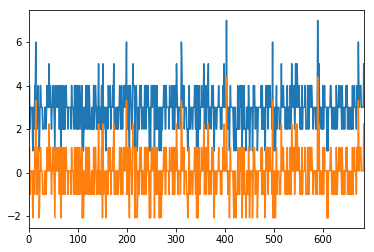

In [42]:
trans["Rooms"].plot(), trans["Z_room"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x19712e2cbe0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19712e2cbe0>)

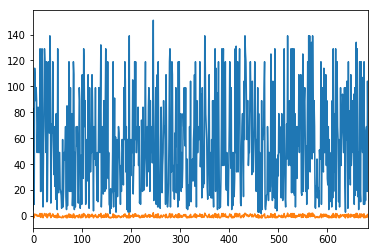

In [43]:
trans["Age"].plot(), trans["Z_age"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x19712e83630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19712e83630>)

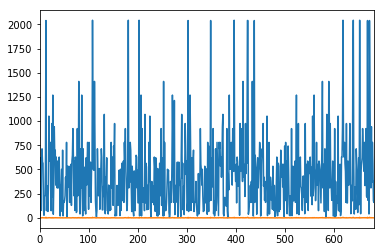

In [44]:
trans["crime_C_average"].plot(), trans["Z_crime"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x19712ee30b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19712ee30b8>)

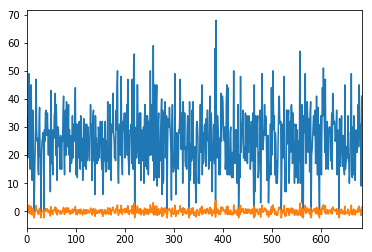

In [45]:
trans["travel_min_to_CBD"].plot(), trans["Z_travel"].plot()

We are only considering the Min Max Standardisation 

After scaling the values, we know that min-max scaler works better.

# Data Transformation:

Firstly, plot the original data, i.e., data before normalization

(array([ 18.,  73., 102.,  95., 100.,  55.,  63.,  41.,  33.,  30.,  18.,
          7.,   8.,   9.,   4.,   4.,   4.,   3.,   3.,   3.,   3.,   3.,
          1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 210000.        ,  371282.05128205,  532564.1025641 ,
         693846.15384615,  855128.20512821, 1016410.25641026,
        1177692.30769231, 1338974.35897436, 1500256.41025641,
        1661538.46153846, 1822820.51282051, 1984102.56410256,
        2145384.61538462, 2306666.66666667, 2467948.71794872,
        2629230.76923077, 2790512.82051282, 2951794.87179487,
        3113076.92307692, 3274358.97435897, 3435641.02564103,
        3596923.07692308, 3758205.12820513, 3919487.17948718,
        4080769.23076923, 4242051.28205128, 4403333.33333333,
        4564615.38461538, 4725897.43589744, 4887179.48717949,
        5048461.53846154, 5209743.58974359, 5371025.64102564,
        5532307.69230769, 5693589.74358974, 585487

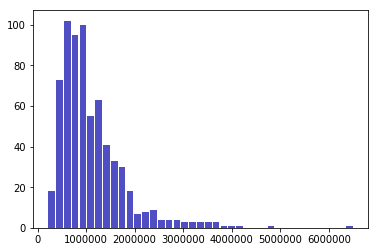

In [46]:
plt.hist(x=trans['Price'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

We can see the price from the orginal plot is Left sckewed

Now we are aiming at the normalized curve by using some transformation techniques

We have the some transformation techniques 

1. Root Transformation
2. Sqaure Power Transformation 
3. Log Transformation

We are checking with the price with which we are going to transform the data 

### Sqaure Power Transformation

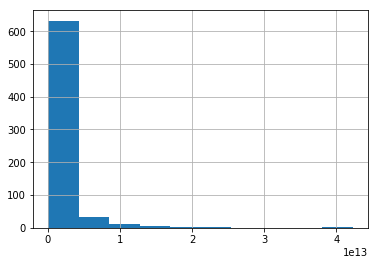

In [47]:
trans['Price'].apply(np.square).hist()

By applying the Square Power Transformation, We can see the data even more right sckewed

So we will be ignoring this transformation for tasnforming the data fo building the model 

### Root Transformation

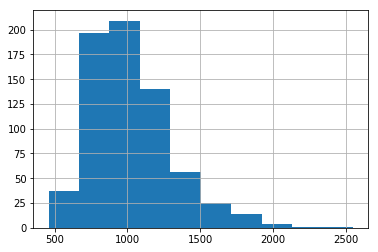

In [48]:
trans['Price'].apply(np.sqrt).hist()

By applying the Root Transformation, we can see that column values are slightly shifted.

BUt still values are not in normalized form. So, we are ignoring even this transformation for transforming the column value.

### Log Transformation

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


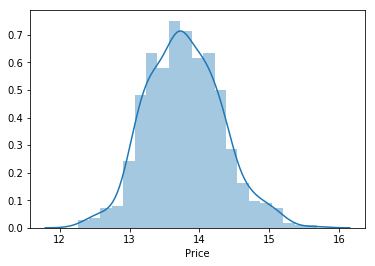

In [49]:
log = trans['Price'].apply(np.log)
sns.distplot(log)

By applying the log tarnsformation on the Price we can see that it is normalised

Now we are going to use this transformation and build the model for predicting the price  

No we are applying the log Transformation to the data and the values are being assigned to the data frame 

In [50]:
import math
trans['lmr'] = None
i = 0
for row in trans.iterrows():
    trans['lmr'].at[i] = math.log(trans["Price"][i])
    i += 1

trans.head()

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,travel_min_to_CBD,crime_C_average,Rooms,Price,Max_age,Max_travel,Max_crime,Max_room,Z_age,Z_travel,Z_crime,Z_room,lmr
0,5.0,34,375.333,3,860000.0,0.020134,0.500000,0.183377,0.333333,-1.353185,0.814656,-0.169216,0.077298,13.6647
1,83.0,33,19,4,1170000.0,0.543624,0.485294,0.008818,0.500000,0.733199,0.721816,-1.085596,1.156314,13.9725
2,9.0,19,620.333,2,480000.0,0.046980,0.279412,0.303396,0.166667,-1.246191,-0.577942,0.460850,-1.001718,13.0815
3,114.0,24,75.6667,3,1775000.0,0.751678,0.352941,0.036577,0.333333,1.562403,-0.113742,-0.939867,0.077298,14.3893
4,104.0,49,553.667,3,663500.0,0.684564,0.720588,0.270738,0.333333,1.294917,2.207254,0.289403,0.077298,13.4053


#### Building the linear regression model for predicting the price

In [51]:
# we are training the model even before scaling the data
X0_train, X0_test, y0_train, y0_test = train_test_split(trans[['Age', 'travel_min_to_CBD', 'crime_C_average','Rooms']],trans['Price'],random_state = 89)
lm = LinearRegression()
lm.fit(X0_train,y0_train)
lm.score(X0_test,y0_test)

0.41407661549840724

In [52]:
# we are building the linear model on the scaled and transformed data 
X1_train, X1_test, y1_train, y1_test = train_test_split(trans[['Max_age', 'Max_travel', 'Max_crime','Max_room']],trans['lmr'],random_state = 89)
lm1 = LinearRegression()
lm1.fit(X1_train,y1_train)
lm1.score(X1_test,y1_test)

0.48301313531654544

We have caluclating the R-score for the model build and we can see that Transformed data r score is better than the before model 

### Conclusion:

Min-Max Scaler:

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

Log Transform :

However, it is sensitive to outliers, so if there are outliers in the data.

Log transforms are popular with time series data as they are effective at removing exponential variance.

It is important to note that this operation assumes values are positive and non-zero. It is common to transform observations by adding a fixed constant to ensure all input values meet this requirement.

# References: